In [12]:
import pint

ureg = pint.get_application_registry()
Q_ = ureg.Quantity
epsilon_0 = Q_(8.85e-12, 'C^2/(N * m^2)')
k_value = 1 / (4 * 3.14159 * epsilon_0)  # Coulomb's constant
q_electron = Q_(-1.602e-19, 'C')

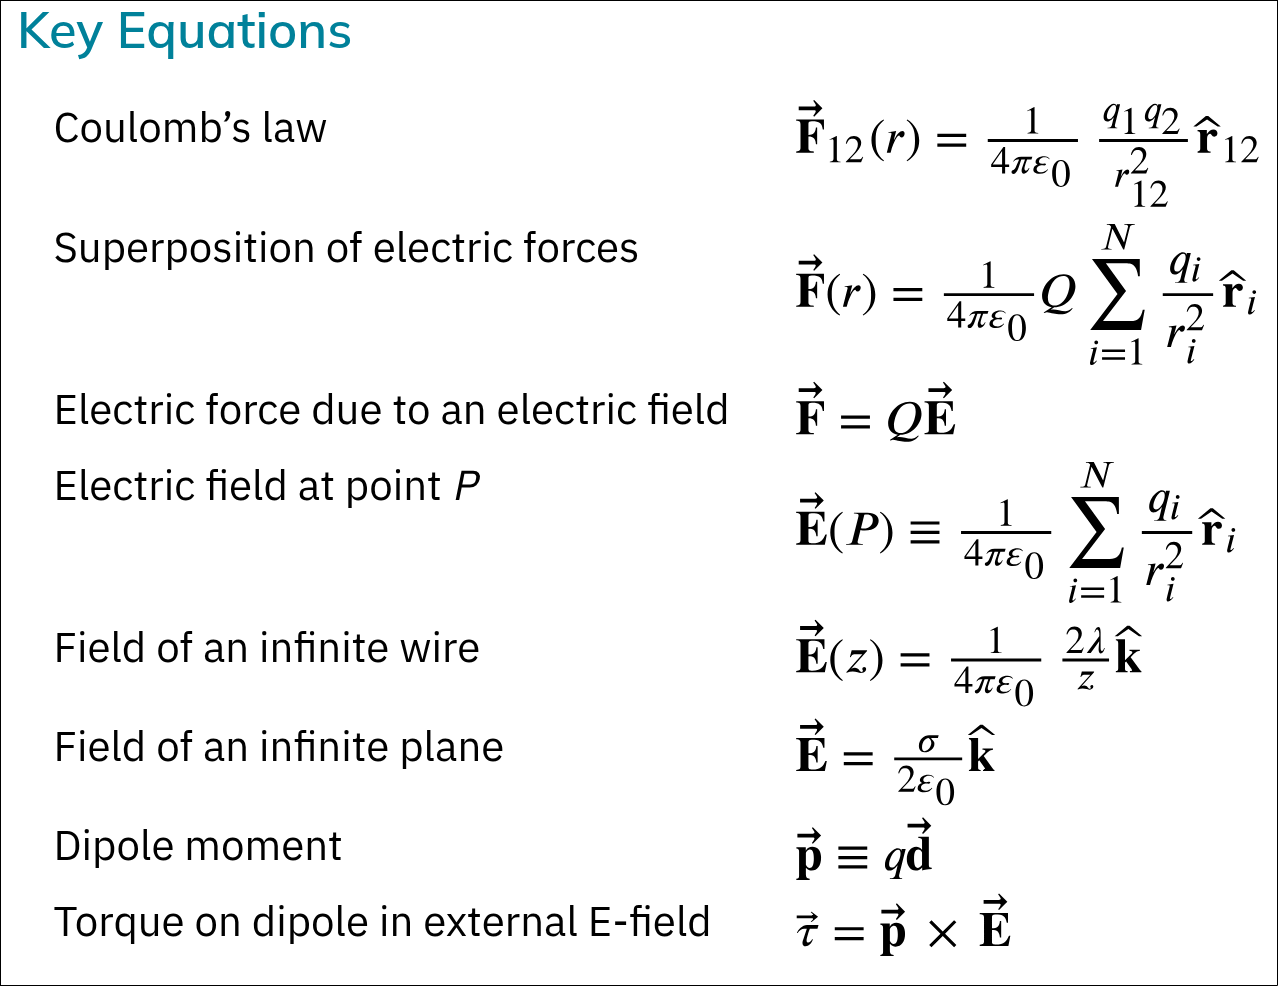

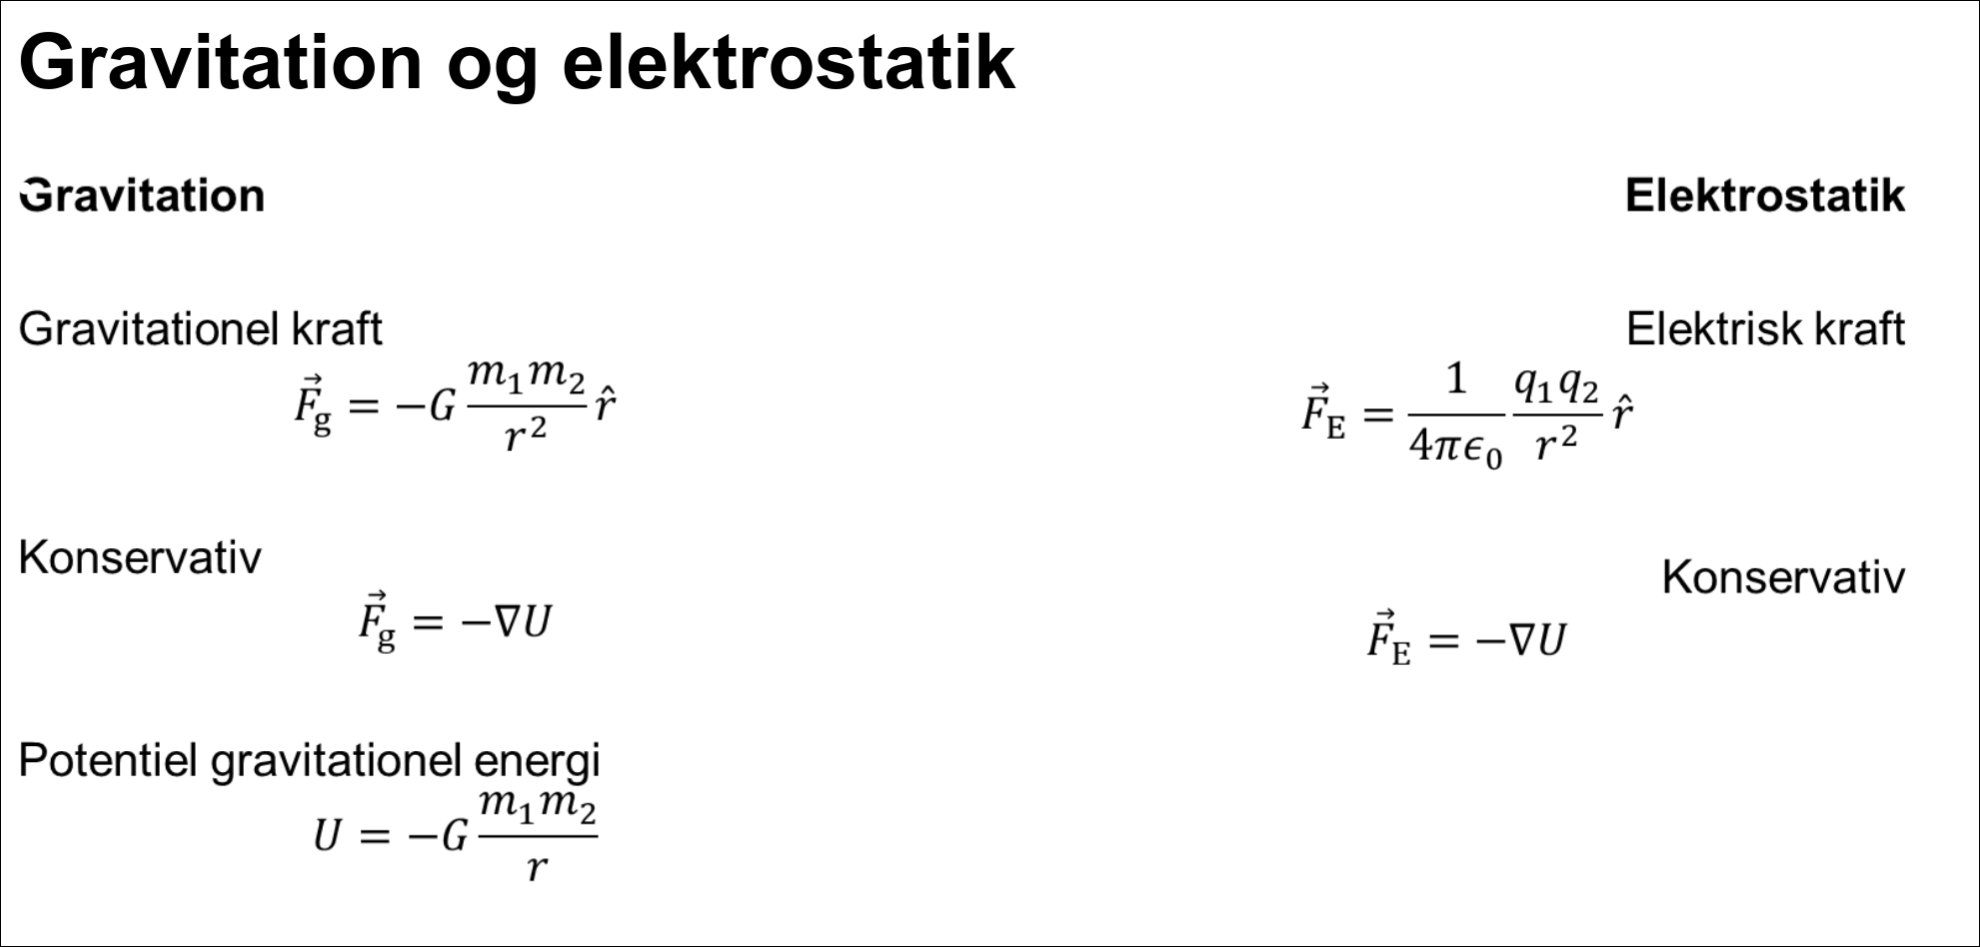

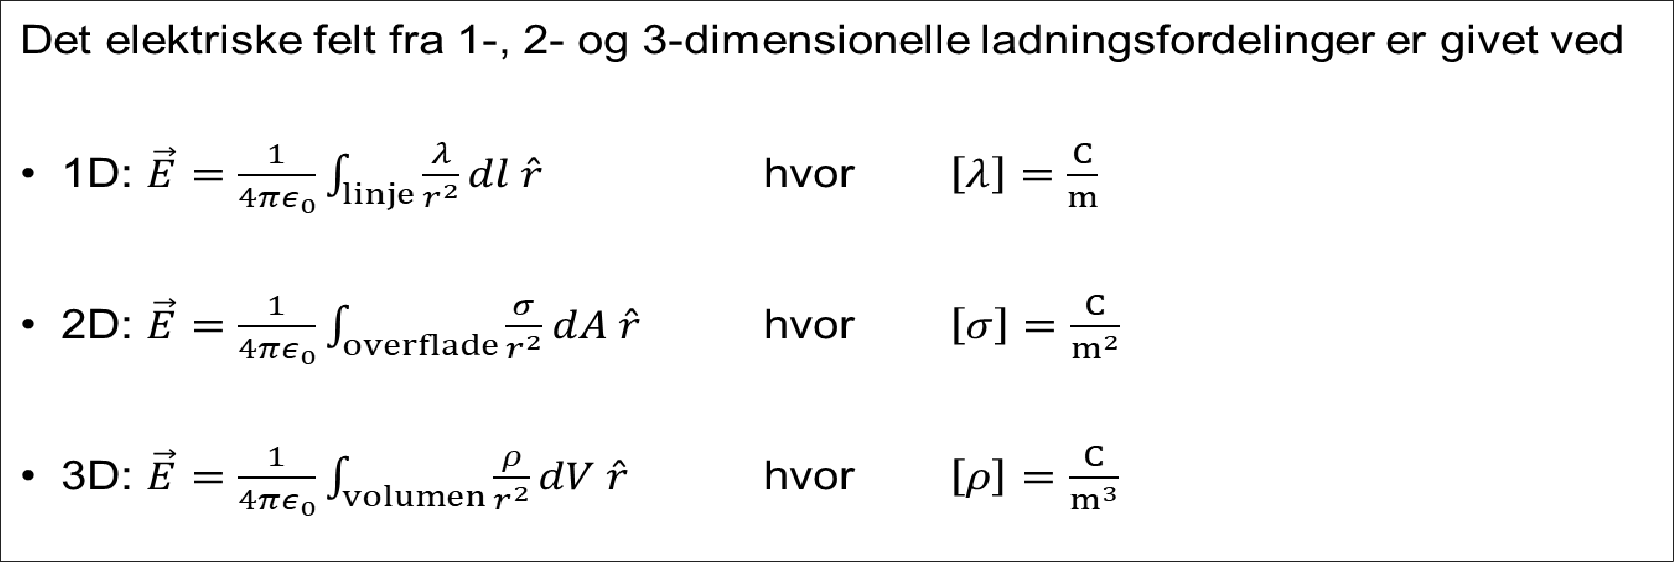

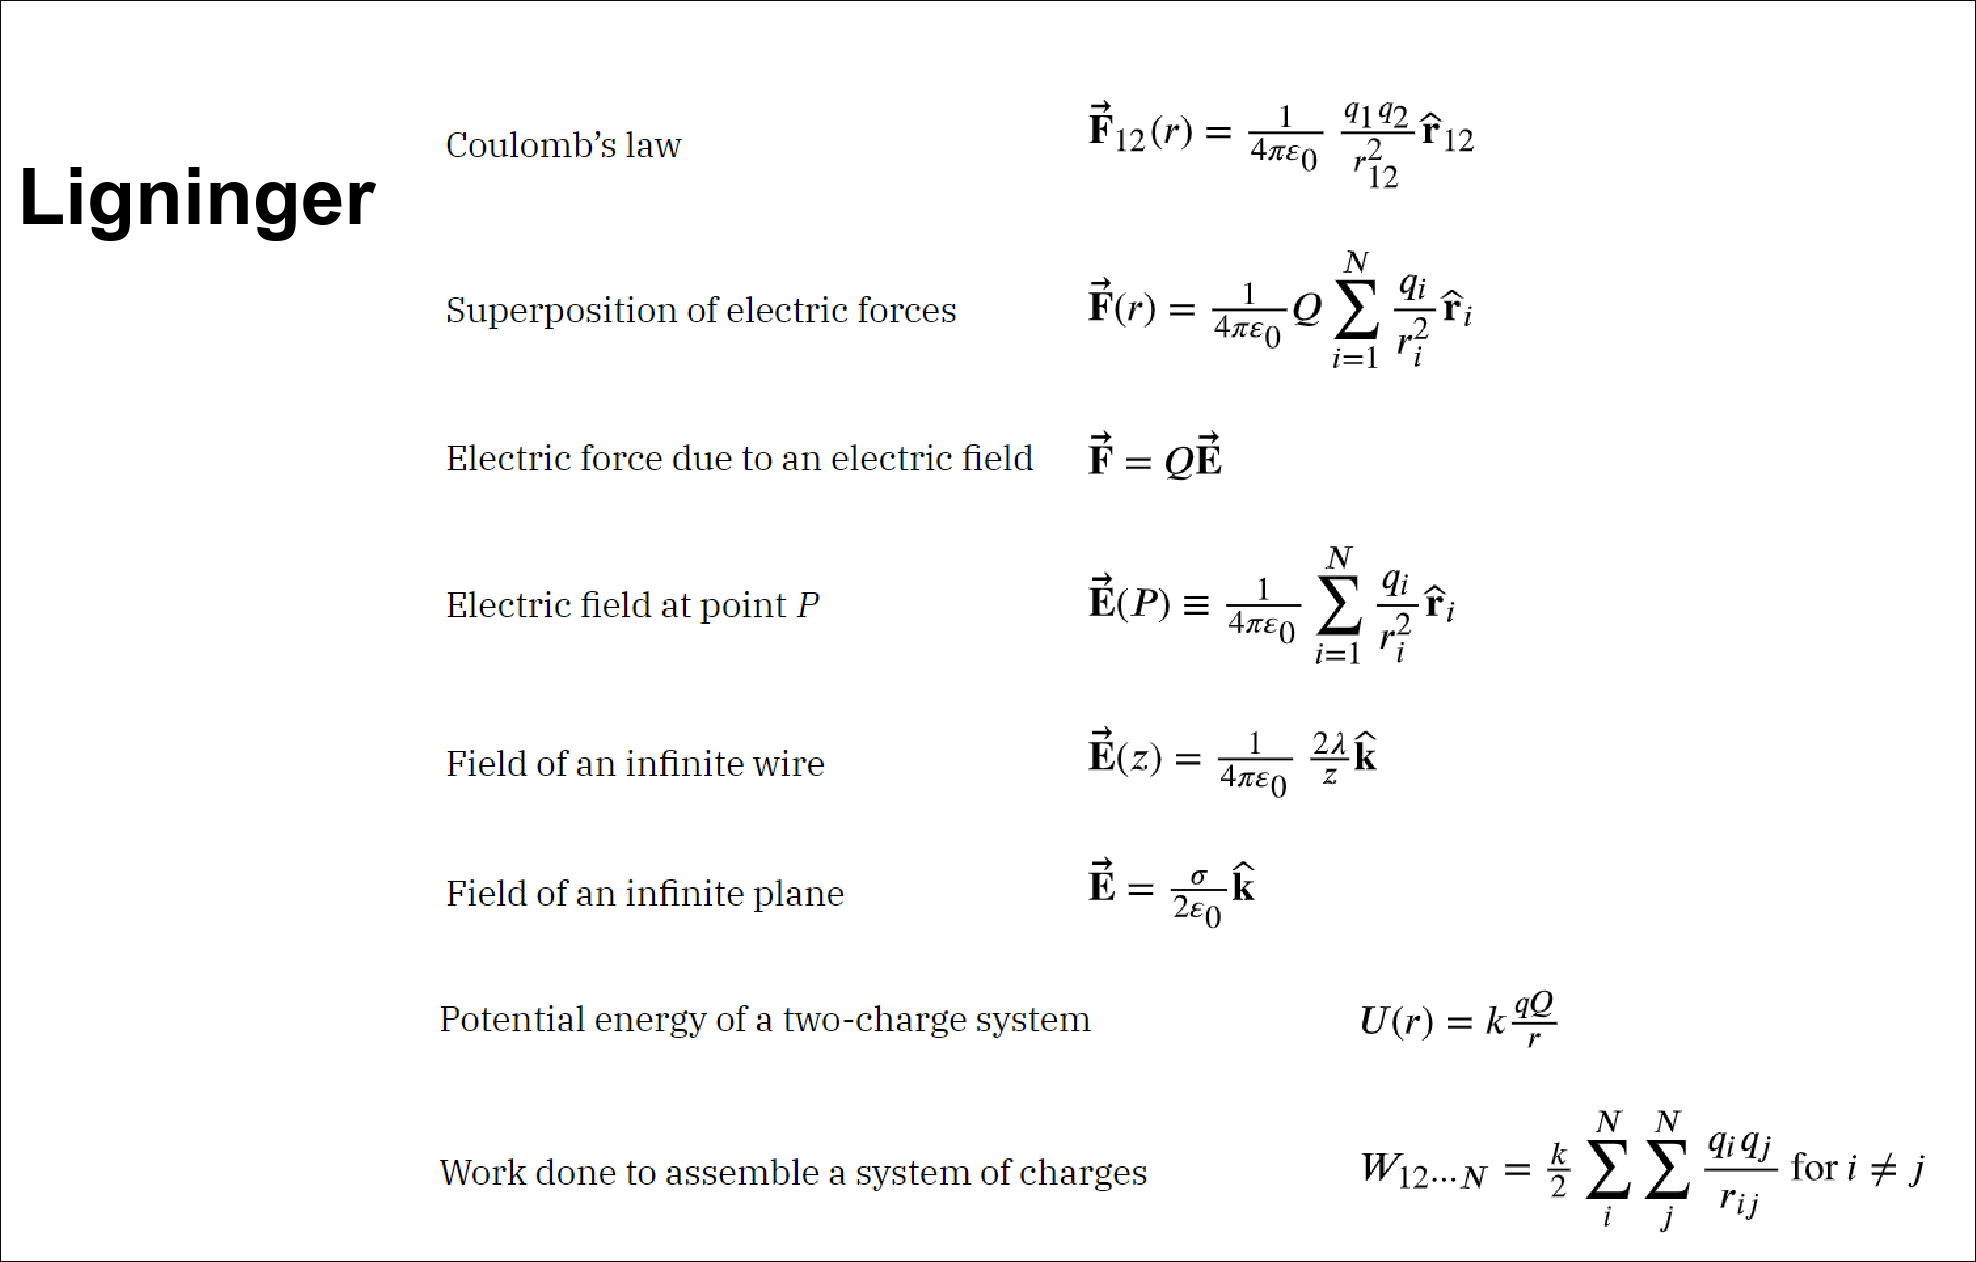

# Exercise 1
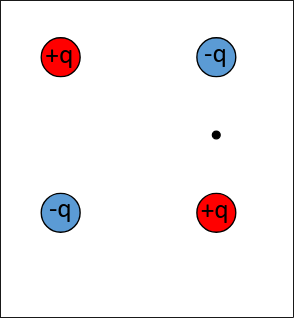

Four point charges of magnitude +/- q are arranged in a square as shown. The black dot is
located in the middle between the two point charges on the right side of the square. Where does
the total electric field point at this point?

A) Towards the left

B) Towards the right

C) Downward

D) Upwards <- The field would point towards the negatively charged side, which in this case means away from the bottom right towards the top right. 

E) The total field is zero

F) Cannot be determined with the given information

G) Don't know

# Exercise 2
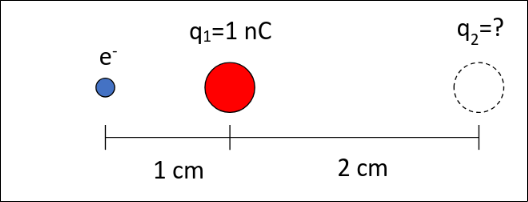

An electron and two spherically symmetric charge distributions are arranged on a line, as shown
in the figure. The two spherically symmetric charge distributions are held fixed, while the
electron is free to move. What must the value of q2 be for the electron to be in static equilibrium?

A) 𝑞2 = 3 nC

B) 𝑞2 = −3 nC

C) 𝑞2 = 4 nC

D) 𝑞2 = −4 nC

E) 𝑞2 = 9 nC

F) 𝑞2 = −9 nC

G) Static equilibrium cannot be obtained for any value of 𝑞2.

H) Don’t know.

In [13]:

# We know the electron is in a static equilibrium, so the net force on it must be zero. 
F_net = Q_(0, 'N')

# Right now we know that q1 has a charge of +1 nC and is located one cm to the right of the electron.
q1 = Q_(1, 'nC')
r1 = Q_(1, 'cm')

# We can now calculate the force on the electron due to q1 using Coulomb's law.
F_12 = k_value * q1 * q_electron / r1**2

# We can now use this value to solve for q2, as we know it's also to the right with a distance of 2 cm.
# F_net = F_12 + F_22 = 0
# F_22 = -F_12
r2 = Q_(3, 'cm')
q2 = -F_12 * r2**2 / (k_value * q_electron)
print(f'The charge q2 must be {q2.to("nC"):.2f} to maintain equilibrium.')

The charge q2 must be -9.00 nanocoulomb to maintain equilibrium.


# Exercise 3
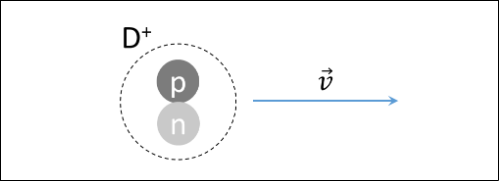

A deuterium ion moves with the speed $|𝑣⃗_{𝑖𝑛𝑖}| = 10^5 \frac{𝑚}{𝑠}$ in vacuum. An external electric field 𝐸⃗⃗ is
applied to slow down the deuterium ion to the speed $|𝑣⃗_{𝑓𝑖𝑛}|$ = 0 $\frac{𝑚}{𝑠}$ .
Calculate the electric field strength |𝐸⃗⃗ | needed to slow down the velocity of the ion to $|𝑣⃗_{𝑓𝑖𝑛}|$ =
0 $\frac{𝑚}{𝑠}$ across a distance of d=10 cm and indicate the direction of the E-field vector relative to the
velocity vector 𝑣⃗ . It is assumed that the nucleon mass $m \approx 1.67 \cdot 10^{-27}$ kg and that the elementary
charge $e=1.602 \cdot 10^{-19}$ C.

A: |𝐸⃗⃗ | ≈ 1042 𝑉/𝑚 , 𝐸⃗⃗ in the direction of 𝑣⃗ .

B: |𝐸⃗⃗ | ≈ 521 𝑉/𝑚 , 𝐸⃗⃗ in the direction of 𝑣⃗ .

C: |𝐸⃗⃗ | ≈ 261 𝑉/𝑚 , 𝐸⃗⃗ in the direction of 𝑣⃗ .

D: |𝐸⃗⃗ | ≈ 1042 𝑉/𝑚 , 𝐸⃗⃗ in the opposite direction of 𝑣⃗ .

E: |𝐸⃗⃗ | ≈ 521 𝑉/𝑚 , 𝐸⃗⃗ in the opposite direction of 𝑣⃗ .

F: |𝐸⃗⃗ | ≈ 261 𝑉/𝑚 , 𝐸⃗⃗ in the opposite direction of 𝑣⃗ .

G: Don’t know.

### Answer
We can solve this by using the work energy theorem, which states that the work done on an object (W) is equal to the change in its kinetic energy ($\Delta K$).

In [14]:
mass = Q_(1.67e-27, 'kg') * 2 # We have a proton and a neutron
v_ini = Q_(10**5, 'm/s')
v_final = Q_(0, 'm/s')
d_distance = Q_(10, 'cm')

charge = q_electron * -1  # Deuterium ion has a charge of +e

# Using the work-energy theorem: W = ΔK
delta_K = 1/2 * mass * (v_final**2 - v_ini**2)

# The work done by the electric field is W = F * d
# where the electric force F = q * E
# To slow the ion down, the work must act in the opposite direction of its motion, so we have:
# W = -(q * E) * d
from sympy import symbols, solve
W, E, q, d = symbols('W E q d')
expr = W + (q * E) * d
E_needed = solve(expr, E)[0]
E_needed

-W/(d*q)

In [15]:
W = delta_K
E_value = -W / (charge * d_distance)
print(f'The required electric field strength is {E_value.to("V/m"):.2f}.')

The required electric field strength is 1042.45 volt / meter.


# Exercise 4
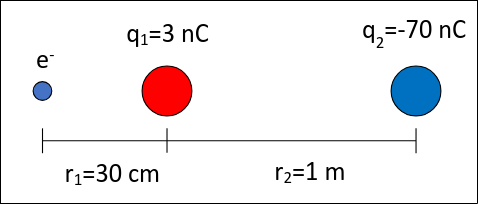

Two spherically symmetric charge distributions, q1 og q2 are held fixed on the x-axis next to an
electron at rest, as shown in the figure. The elektronen is released to move under the influence of
the electric forces from the two charge distributions, but no other forces.
The mass and charge of the electron are given by $m_e=9.11 \cdot 10^{-31}$ kg and $-e=-1.602 \cdot 10^{-19}$ C.

a) If we take the electrostatic potential energy to be zero at infinity, what is then the potential
energy of the electron in the initial configuration?

b) What will be the final speed of the electron when it is (infinitely) far from the two other
charges?

In [16]:
# a)
m_e = Q_(9.11e-31, 'kg')

q_e = q_electron
q_1 = Q_(3, 'nC')
q_2 = Q_(-70, 'nC')

r_1 = Q_(30, 'cm') 
r_2 = Q_(1, 'm') + r_1

# We use the formula for potential energy of a two-charge system: U = k * q1 * q2 / r
U_e1 = k_value * q_e * q_1 / r_1
U_e2 = k_value * q_e * q_2 / r_2
U_initial = U_e1 + U_e2
print(f'The total potential energy of the electron in the initial configuration is {U_initial.to("J"):.2e}.')

# b)
# Using conservation of energy: U_initial = K_final + U_final
# Since the electron is released from rest, K_initial = 0
# At infinity, U_final = 0
# We then must have that
K_final = U_initial

# We can now solve for the final speed of the electron using K_final = 1/2 * m_e * v_final^2
v_final = (2 * K_final / m_e)**0.5 # ^0.5 is square root
print(f'The speed of the electron when it is very far from the two charge distributions is {v_final.to("m/s"):.2e}.')

The total potential energy of the electron in the initial configuration is 6.32e-17 joule.
The speed of the electron when it is very far from the two charge distributions is 1.18e+07 meter / second.


# Exercise 5
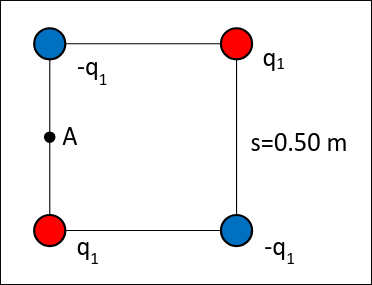

Four point charges are arranged in a square with side length s=0.50 m as shown in the figure.
The red point charges have the positive charge 𝑞1=100 nC, while the blue ones have charge −𝑞1.
Point A is in the middle of the left side of the square.
Determine the field strength, i.e. the length of the electric field vector, at point A.

A) E=0 N/C

B) E=$4.6 \cdot 10^3 \frac{N}{C}$

C) E=$1.5 \cdot 10^4 \frac{N}{C}$

D) E=$2.4 \cdot 10^4 \frac{N}{C}$

E) E=$2.6 \cdot 10^4 \frac{N}{C}$

F) E=$3.1 \cdot 10^4 \frac{N}{C}$

G) E=$3.5 \cdot 10^4 \frac{N}{C}$

H) Don’t know

In [17]:
q1 = Q_(100, 'nC')
s = Q_(0.5, 'm')

# First we can calculate the electric fields for the ones on the same x point 
r_left = s / 2
E_magnitude_left = k_value * q1 / r_left**2
# We note that one would point up (away from the positive charge), and the other down (towards the negative charge).
# So both would point up using A as a reference.
E_left = E_magnitude_left * 2  # Both contribute

# Now we can focus on the right side
# The distance r_right​ is the hypotenuse of a triangle with sides s=0.50 m and s/2=0.25 m.
r_right = s**2 + (s/2)**2 # this is r^2 
E_magnitude_right = k_value * q1 / r_right
# Now we note the direction of the fields for the top one x is negative and so is y, but for the bottom one x is positive while y is the same.
# As the x components cancel out, we only need to consider the y components, which both point up.
# This can be done by multiplying with sin(theta) = opposite/hypotenuse
r_right_hyp = r_right**0.5
E_magnitude_y = E_magnitude_right * (s/2) / r_right_hyp
E_right = E_magnitude_y * 2  # Both contribute

E_total = E_left - E_right
print(f'The total electric field at point A is {E_total.to("N/C"):.1e} upward.')



The total electric field at point A is 2.6e+04 newton / coulomb upward.


# Exercise 6
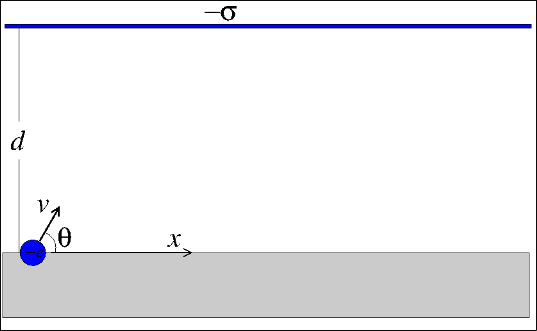

An electron is detached from the surface of a neutral material located at a distance d under an
infinite planar charge distribution with negative charge density -σ, as illustrated in the figure.
The electron is detached with speed v0 and the speed vector forms the angle θ with the x-axis, as
shown in the figure. Numerical values are d=1.0 cm, σ=1.0 μC/m2, θ=60.0º, $v0=2.0 \cdot 10^7$ m/s. The
starting point of the electron is taken to be (x,y)=(0,0).

a) Determine the magnitude and direction of the electric field from the charge distribution, and of
the force on the electron.

b) What type of trajectory will the electron describe?

c) Will the electron fall back on the neutral material, and if so where? Hint: Find expressions for
maximum height and range on the basis of results from the previous semester.

In [18]:
# a) 
# We use the field of an infinite plane: E = sigma / (2 * epsilon_0)
sigma = -Q_(1.0, 'uC/m^2')
E = sigma / (2 * epsilon_0)
print(f'The magnitude of the electric field from the charge distribution is {abs(E.to("N/C")):.2e}.')
print('Electric field lines point towards negative charges. Since the plate at y = d is negatively charged, the electric field E points upwards. \n')

# We can now calculate the force on the electron due to this field: F = q * E
F_electric = q_electron * E
print(f'The force acting on the electron is {abs(F_electric.to("N")):.2e}.')
print('Since the electron has a negative charge and the electric field points upwards, the force on the electron points in the opposite dir, so downwards.')

The magnitude of the electric field from the charge distribution is 5.65e+04 newton / coulomb.
Electric field lines point towards negative charges. Since the plate at y = d is negatively charged, the electric field E points upwards. 

The force acting on the electron is 9.05e-15 newton.
Since the electron has a negative charge and the electric field points upwards, the force on the electron points in the opposite dir, so downwards.


#### b)
The electron is subject to a constant force F that points only in the negative y-direction. This is the same as a projectile launched on Earth, where gravity provides a constant downward force.
* There is no force in the x-direction, so ax​=0 and the x-velocity is constant.
* There is a constant force in the y-direction, so ay​ is constant and non-zero.

This is the definition of projectile motion, which always follows a parabolic trajectory.

In [19]:
from numpy import sin, cos
# c) 
# To find if it returns we need to check if y_max > d
a_y = F_electric / m_e
v_0 = Q_(2.0e7, 'm/s')
# We now need to translate v_0 into its x- and y-component
theta = Q_(60.0, 'degrees').to('radians')

v_0x = v_0 * cos(theta)
v_0y = v_0 * sin(theta)

print(f'The acceleration of the electron in the y-direction is {a_y.to("m/s^2"):.2e} and the initial velocity in the x- and y-direction are {v_0x.to("m/s"):.2e} and {v_0y.to("m/s"):.2e}, respectively.')

y_max = (v_0y**2) / (2 * a_y)
print(f'The maximum height the electron reaches is {y_max.to("cm"):.2e}.')
if y_max > Q_(1.0, 'cm'):
    print('The electron will not return to the surface of the material.')
else:
    print('The electron will return to the surface of the material.')

The acceleration of the electron in the y-direction is 9.94e+15 meter / second ** 2 and the initial velocity in the x- and y-direction are 1.00e+07 meter / second and 1.73e+07 meter / second, respectively.
The maximum height the electron reaches is 1.51e+00 centimeter.
The electron will not return to the surface of the material.


# Exercise 7
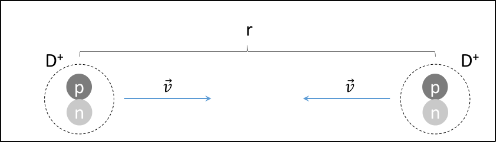

Two deuterium ions move paraxially toward each other with equal speeds v. Determine the speed
|𝑣⃗ | needed to bring the deuterium ions within a distance of $r = 10^{-15}$ m from each other, which is
the distance where nuclear forces come into play.
It is assumed that the elementary nuclear mass is $m \approx 1.67 \cdot 10^{-27}$ kg and the elementary charge is
$e=1.602 \cdot 10^{-19}$ C. It is further assumed that the deuterium ions start out infinitely far from each
other, and that they are not influenced by other external forces than their own electric forces.

A: |𝑣⃗ | ≈ $1.66 \cdot 10^{6} \frac{𝑚}{𝑠}$

B: |𝑣⃗ | ≈ $1.76 \cdot 10^{7} \frac{𝑚}{𝑠}$

C: |𝑣⃗ | ≈ $2. 08 \cdot 10^{16} \frac{𝑚}{𝑠}$

D: |𝑣⃗ | ≈ $8.31 \cdot 10^{6} \frac{𝑚}{𝑠}$

E: |𝑣⃗ | ≈ $6.91 \cdot 10^{13} \frac{𝑚}{𝑠}$

F: |𝑣⃗ | ≈ $3.00 \cdot 10^{8} \frac{𝑚}{𝑠}$ , the speed of light.

G: The ions will never get so close without an external electric field.

H: Don’t know.

#### Answer

We use the conservation of energy law:

$E_{tot} = K + U$

**t_0**
The ions are "infinitely far" from each other, so their initial potential energy is $U_{initial} = 0$

For the motion the total kinetic energy is the sum for both particles

$K_{initial} = K_1 + K_2 = \frac{1}{2} \cdot m \cdot v^2 + \frac{1}{2} \cdot m \cdot v^2 = m \cdot v^2$

We also note that $E_{initial} = K_{initial} + U_{initial} = K_{initial}$

**t_final**

The ions are at their closest distance, $r=10^{−15}$ m. At this point, the repulsion has stopped their inward motion.

$K_{final} = 0$

While the potential energy of two point charges is 

$U_{final} = k\frac{q1q2}{r}$

As the charge of one deuterium ion is just e we get

$U_{final} = k\frac{e^2}{r}$

The final energy is then $E_{final} = K_{final} + U_{final} = k\frac{e^2}{r}$

**Conservation**

Now, we set the initial and final energies equal to each other and solve for v.

In [20]:
m, v, k, e, r = symbols('m v k e r') 
E_initial = m * v**2
E_final = k * e**2 / r
expr = E_initial - E_final
v_solution = solve(expr, v)[1]
v_solution

e*sqrt(k/(m*r))

In [21]:
r = Q_(10**-15, 'm')
m = Q_(1.67e-27, 'kg') * 2  # There it two deterium nucleons

v = (k_value * q_e**2 / (m * r))**0.5
print(f'The speed of the proton when it is very close to the nucleus is {v.to("m/s"):.2e}.')

The speed of the proton when it is very close to the nucleus is 8.31e+06 meter / second.


# Exercise 8
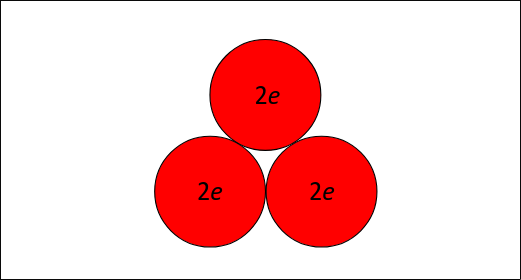

In the so-called ’triple-alpha’ process Carbon-12 is formed by the collision of 3 alpha-particles
(He-4 nuclei) which must be brought very close to each other within a time interval of ~$10^{-17}$ s.
This process is thought to be decisive for the formation of Carbon and heavier elements in the
universe.

In this exercise the alpha-particle is described as a spherically symmetric charge distribution with
a radius of $1.68 \cdot 10^{-15}$ m, and an electric charge of 2e where e is the elementary charge, $1.602 \cdot 10^{-19}$ C.

We consider 3 alpha-particles which are very far from each other in the initial state, and having a
total kinetic energy $K_i$ . What is the minimal value of $K_i$ needed to bring the three alpha-particles
to just touch each other as shown in the figure, assuming that only electrostatic forces need to be
taken into account?

A) 0.206 pJ

B) 0.412 pJ

C) 0.549 pJ

D) 0.824 pJ

E) 1.65 pJ

F) 2.23 pJ

G) 3.30 pJ

H) Don’t know

#### Answer
We can again use conservation of energy. 

**Initial State** 
* **Particles:** The three alpha-particles are "very far from each other."
* **Initial Potential Energy ($U_{initial}$​):** Because the separation distance is effectively infinite ($r\to \infty$), the initial electrostatic potential energy of the system is $U_{initial}=0$.
* **Initial Kinetic Energy ($K_{initial}$​):** This is the value $K_i$​ we need to find.
* **Total Initial Energy:** $E_{initial}=K_i​+0=K_i$​

### 2. Final State
* **Particles:** The three alpha-particles are "just touching," forming an equilateral triangle as shown in the figure.
* **Final Kinetic Energy ($K_{final}$):** The problem asks for the *minimal* value of $K_i$. This implies that the particles use all their initial kinetic energy to overcome the electrostatic repulsion. At the moment they touch, they are momentarily at rest. Therefore, **$K_{final} = 0$**.
* **Final Potential Energy ($U_{final}$):** This is the total electrostatic potential energy required to assemble the three charges at their final positions. We must sum the potential energy for each unique pair of particles (1-2, 1-3, and 2-3).
    $$U_{final} = U_{12} + U_{13} + U_{23}$$
    
    Since all charges and all distances are identical, the three potential energy terms are equal:
    $$U_{\text{final}} = 3 \times \left( k \frac{q \cdot q}{r} \right) = 3 \times \left( k \frac{(2e)^2}{r} \right) = 3 \times \left( k \frac{4e^2}{r} \right)$$
    $$\mathbf{U_{\text{final}} = \frac{12 k e^2}{r}}$$

In [22]:
r = Q_(1.68e-15, 'm') * 2 # The centers are two radii apart
U_final = 12 * k_value * q_electron**2 / r

# As we have conservation of energy:
# K_i = U_final
print(f'The minimal initial kinetic energy K_i required for the three alpha-particles to just touch is {U_final.to("pJ"):.3f}.')

The minimal initial kinetic energy K_i required for the three alpha-particles to just touch is 0.824 picojoule.
